In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import librosa
import pandas as pd
import os
from datetime import datetime


#convert the data and labels for understandable numerical data
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [2]:
#extract feature from the given audio
def extract_feature(file):
  max_pad_len = 174
  try:
    audio, sr = librosa.load(file, res_type = 'kaiser_fast')
    mfccs = librosa.feature.mfcc(audio, sr = sr, n_mfcc =40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width =((0,0), (0,pad_width)), mode = 'constant')

  except Exception as e:
    print("Error happened while parsing the file", file)
    return None
		
  return mfccs


In [3]:
features = []
def extract_feature_all():
	
	start_time = datetime.now()
	for index, row in metadata.head(100).iterrows():
		audio_file_name = os.path.join(os.path.abspath(full_dataset_path) , 'fold' + str(row['fold']) + '/' + str(row['slice_file_name']))
		
		class_label = row['class_name']
		data = extract_feature(audio_file_name)
		
		features.append([data, class_label])
		print("loaded {} file ".format(index))
	
	featuresdf = pd.DataFrame(features, columns = ['feature', 'class_label'])
	loaded_time = datetime.now() - start_time
	print("total {} files loaded by taking {} time".format(len(featuresdf), loaded_time))
	
	return featuresdf

In [ ]:
%cd /content/drive/MyDrive/datasets/UrbanSound8K/

/content/drive/MyDrive/datasets/UrbanSound8K


In [ ]:
full_dataset_path = os.path.abspath('/content/drive/MyDrive/datasets/UrbanSound8K/audio')
metadata = pd.read_csv('/content/drive/MyDrive/datasets/UrbanSound8K/metadata/UrbanSound8K.csv')

In [ ]:
metadata = metadata[['slice_file_name', 'fold', 'class_name']]
print(metadata.head(5))

      slice_file_name  fold        class_name
0    100032-3-0-0.wav     5          dog_bark
1  100263-2-0-117.wav     5  children_playing
2  100263-2-0-121.wav     5  children_playing
3  100263-2-0-126.wav     5  children_playing
4  100263-2-0-137.wav     5  children_playing


In [ ]:
df = extract_feature_all()
# df.to_hdf('features_from_UrbanSound_for_cnn_by_mfcc.h5', key='df',mode='w')

loaded 0 file 
loaded 1 file 
loaded 2 file 
loaded 3 file 
loaded 4 file 
loaded 5 file 
loaded 6 file 
loaded 7 file 
loaded 8 file 
loaded 9 file 
loaded 10 file 
loaded 11 file 
loaded 12 file 
loaded 13 file 
loaded 14 file 
loaded 15 file 
loaded 16 file 
loaded 17 file 
loaded 18 file 
loaded 19 file 
loaded 20 file 
loaded 21 file 
loaded 22 file 
loaded 23 file 
loaded 24 file 
loaded 25 file 
loaded 26 file 
loaded 27 file 
loaded 28 file 
loaded 29 file 
loaded 30 file 
loaded 31 file 
loaded 32 file 
loaded 33 file 
loaded 34 file 
loaded 35 file 
loaded 36 file 
loaded 37 file 
loaded 38 file 
loaded 39 file 
loaded 40 file 
loaded 41 file 
loaded 42 file 
loaded 43 file 
loaded 44 file 
loaded 45 file 
loaded 46 file 
loaded 47 file 
loaded 48 file 
loaded 49 file 
loaded 50 file 
loaded 51 file 
loaded 52 file 
loaded 53 file 
loaded 54 file 
loaded 55 file 
loaded 56 file 
loaded 57 file 
loaded 58 file 
loaded 59 file 
loaded 60 file 
loaded 61 file 
loaded 62 file 
lo

In [4]:
df = pd.read_hdf('features_from_UrbanSound_for_cnn.h5')

In [5]:
print(df.shape)
print(df.feature[0].shape)
print(df.head(5))

(8732, 2)
(40, 174)
                                             feature       class_label
0  [[-306.77255, -177.59209, -99.13616, -65.97198...          dog_bark
1  [[-457.69534, -451.0248, -450.68613, -445.0000...  children_playing
2  [[-468.0367, -467.42264, -481.04654, -486.5948...  children_playing
3  [[-422.42215, -411.9085, -409.46243, -409.0892...  children_playing
4  [[-438.10162, -434.47787, -443.3284, -442.6643...  children_playing


In [ ]:
df.to_csv('mfcc_cnn.csv',index=False)

In [ ]:
pip install --upgrade tables

     |████████████████████████████████| 4.3 MB 8.6 MB/s 
  Attempting uninstall: tables
    Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [ ]:
# df = pd.read_hdf('/content/drive/MyDrive/datasets/features_from_UrbanSound_for_cnn.h5', 'df')
df = pd.read_csv('/content/drive/MyDrive/datasets/UrbanSound8K/mfcc_features_100_files.csv')

In [6]:
print(df.shape)
df.head(5)

(8732, 2)


,feature,class_label
0,"[[-306.77255, -177.59209, -99.13616, -65.97198...",dog_bark
1,"[[-457.69534, -451.0248, -450.68613, -445.0000...",children_playing
2,"[[-468.0367, -467.42264, -481.04654, -486.5948...",children_playing
3,"[[-422.42215, -411.9085, -409.46243, -409.0892...",children_playing
4,"[[-438.10162, -434.47787, -443.3284, -442.6643...",children_playing


In [7]:
def prepare_dataset(test_size, validation_size): 	
	#load data
	X = np.array(df.feature.tolist())
	y = np.array(df.class_label.tolist())
	
	le = LabelEncoder()
	y = to_categorical(le.fit_transform(y))
	
	#create train/test split
	X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size)
	
	#create train/validation split
	X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = validation_size)

	#for CNN tensor flow expects a 3d array -->(130,13,1)
	X_train = X_train[...,np.newaxis] #4d array --> (num_samples, 130, 13,1)
	X_validation = X_validation[...,np.newaxis]
	X_test = X_test[...,np.newaxis]
	
	return X_train, X_validation, X_test, y_train, y_validation, y_test , le


In [8]:
X_train, X_validation, X_test, y_train, y_validation, y_test, le= prepare_dataset(0.25, 0.2)

In [118]:
def build_model(input_shape):
	
	#create model 
	model = keras.Sequential()
	#1st conv layer
	model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape= input_shape))
	model.add(keras.layers.MaxPool2D((3,3), strides = (2,2), padding = 'same'))
	model.add(keras.layers.BatchNormalization()) # speed up korbe>> normalise korbe...details bole nai...beginning level e na janleo ok!
	
	
	#param>>filters, kernel_size, 
	#2nd conv layer
	model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape= input_shape))
	#param>> kernel_size, padding same means zero padding
	model.add(keras.layers.MaxPool2D((3,3), strides = (2,2), padding = 'same'))
	model.add(keras.layers.BatchNormalization())
	
	
	model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu', input_shape= input_shape))
	model.add(keras.layers.MaxPool2D((3,3), strides = (2,2), padding = 'same'))
	model.add(keras.layers.BatchNormalization())

    #3rd conv layer
	model.add(keras.layers.Conv2D(256, (2, 2), activation = 'relu', input_shape= input_shape))
	model.add(keras.layers.MaxPool2D((3,3), strides = (2,2), padding = 'same'))
	model.add(keras.layers.BatchNormalization())
    

    
	model.add(keras.layers.Conv2D(512, (2, 2), activation = 'relu', input_shape= input_shape))
	model.add(keras.layers.MaxPool2D((3,3), strides = (2,2), padding = 'same'))
# 	model.add(keras.layers.BatchNormalization())
    
# 	model.add(keras.layers.Conv2D(1024, (2, 2), activation = 'relu', input_shape= input_shape))
# 	model.add(keras.layers.MaxPool2D((2,2), strides = (2,2), padding = 'same'))
# 	model.add(keras.layers.BatchNormalization())
    
	
	model.add(keras.layers.GlobalAveragePooling2D())
	#flatten the output and feed it into dense layer
	model.add(keras.layers.Flatten())
	model.add(keras.layers.Dense(256,activation='relu'))
	model.add(keras.layers.Dense(128,activation='relu'))    
	model.add(keras.layers.Dense(64, activation = 'relu'))
# 	model.add(keras.layers.Dense(64, activation = 'relu'))
	model.add(keras.layers.Dropout(0.3))
	
	#output layer
	model.add(keras.layers.Dense(10, activation = 'softmax'))

	return model


In [124]:
#build the CNN net
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]) 
model = build_model(input_shape)

In [125]:
print(input_shape)
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)
print(X_train[0].shape)

(40, 174, 1)
(5239, 40, 174, 1)
(1310, 40, 174, 1)
(2183, 40, 174, 1)
(40, 174, 1)


In [126]:
#Compile the CNN
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer, loss= "categorical_crossentropy",
metrics=['accuracy'])

In [127]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 38, 172, 32)       320       
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 19, 86, 32)        0         
_________________________________________________________________
batch_normalization_84 (Batc (None, 19, 86, 32)        128       
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 17, 84, 64)        18496     
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 9, 42, 64)         0         
_________________________________________________________________
batch_normalization_85 (Batc (None, 9, 42, 64)         256       
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 7, 40, 128)      

In [128]:
#train the CNN
start_time = datetime.now()
history = model.fit(X_train, y_train, validation_data = (X_validation, y_validation), batch_size = 32, epochs = 40 )
duration = datetime.now() - start_time
print("Duration for the train {}".format(duration))
# model.save('cnn_model_after_training_by_mfcc.h5')
 

#saving all the history for future ploting
# f = open('mfcc_training_history_cnn' , 'wb')
# pickle.dump(H.history, f)
# f.close()



Epoch 1/40
164/164 [==============================] - 36s 217ms/step - loss: 1.7686 - accuracy: 0.3682 - val_loss: 1.6423 - val_accuracy: 0.4573
Epoch 2/40
164/164 [==============================] - 35s 212ms/step - loss: 0.9948 - accuracy: 0.6644 - val_loss: 0.9297 - val_accuracy: 0.7000
Epoch 3/40
164/164 [==============================] - 33s 202ms/step - loss: 0.7502 - accuracy: 0.7621 - val_loss: 0.6422 - val_accuracy: 0.8008
Epoch 4/40
164/164 [==============================] - 34s 207ms/step - loss: 0.5538 - accuracy: 0.8255 - val_loss: 0.5160 - val_accuracy: 0.8328
Epoch 5/40
164/164 [==============================] - 34s 210ms/step - loss: 0.4868 - accuracy: 0.8471 - val_loss: 0.4131 - val_accuracy: 0.8679
Epoch 6/40
164/164 [==============================] - 36s 221ms/step - loss: 0.3594 - accuracy: 0.8810 - val_loss: 0.4385 - val_accuracy: 0.8557
Epoch 7/40
164/164 [==============================] - 32s 196ms/step - loss: 0.2830 - accuracy: 0.9132 - val_loss: 0.3874 - val_ac

In [129]:
model.save('cnn_model_after_training_by_mfcc_layer_increasd_5layer3rd.h5')
 
import pickle
# saving all the history for future ploting
f = open('mfcc_training_history_cnn_5_layer_upgraded_best' , 'wb')
pickle.dump(history.history, f)
f.close()


In [101]:
#test the model again
def testing():
	train_error, train_accuracy = model.evaluate(X_train, y_train, verbose = 1)
	test_error, test_accuracy = model.evaluate(X_test, y_test, verbose =1)

	print("Train error: {} , Train Accuracy: {} ".format(train_error, train_accuracy))
	print("Test error: {} , Test Accuracy: {} ".format(test_error, test_accuracy)) 


In [130]:
testing()

69/69 [==============================] - 3s 38ms/step - loss: 0.2943 - accuracy: 0.9249
Train error: 0.0030780755914747715 , Train Accuracy: 0.9994273781776428 
Test error: 0.29428282380104065 , Test Accuracy: 0.9248740077018738 


In [131]:
#evaluate the CNN on the test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose = 1)
print("Accuracy on test set is : {}". format(test_accuracy))

69/69 [==============================] - 3s 39ms/step - loss: 0.2943 - accuracy: 0.9249
Accuracy on test set is : 0.9248740077018738


In [69]:
####### ploting training history ##############
import matplotlib.pyplot as plt

def plot_history(H):

  plt.style.use('ggplot')  
  fig, axs = plt.subplots(2,figsize=(13,13))
  #create accuracy subplots
  axs[0].plot(H.history["accuracy"], label="train accuracy")
  axs[0].plot(H.history["val_accuracy"], label="test accuracy")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc="lower right")
  axs[0].set_title("Accuracy eval")
	
	#create error subplots
  axs[1].plot(H.history["loss"], label="train error")
  axs[1].plot(H.history["val_loss"], label="test error")
  axs[1].set_ylabel("Error")
  axs[1].set_xlabel("Epoch")
  axs[1].legend(loc="upper right")
  axs[1].set_title("Error eval")
  
  plt.show()

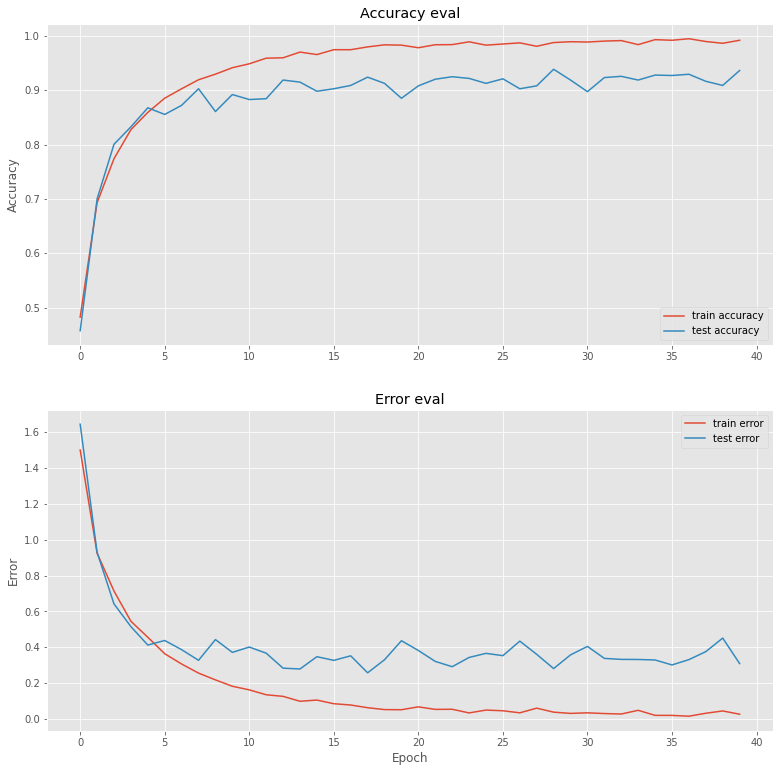

In [132]:
plot_history(history)

In [71]:
#prediction _function
def prediction(input_file):
	prediction_feature = extract_feature(input_file)

	prediction_feature = prediction_feature[np.newaxis, ... , np.newaxis]
	predicted_vector = model.predict_classes(prediction_feature)
	predicted_class = le.inverse_transform(predicted_vector)
	print("The predicted class is:", predicted_class[0], '\n') 

	return predicted_class[0]
	

In [ ]:
X_train, X_validation, X_test, y_train, y_validation, y_test,le = prepare_dataset(0.25, 0.2)
	
#load model
model2 = keras.models.load_model('/content/drive/MyDrive/datasets/cnn_model_after_training.h5')

#testing the cnn model

In [ ]:
	train_error, train_accuracy = model2.evaluate(X_train, y_train, verbose = 1)
	test_error, test_accuracy = model2.evaluate(X_test, y_test, verbose =1)

	print("Train error: {} , Train Accuracy: {} ".format(train_error, train_accuracy))
	print("Test error: {} , Test Accuracy: {} ".format(test_error, test_accuracy)) 

69/69 [==============================] - 0s 4ms/step - loss: 0.2812 - accuracy: 0.9404
Train error: 0.29390841722488403 , Train Accuracy: 0.9362473487854004 
Test error: 0.28123781085014343 , Test Accuracy: 0.9404489398002625 
